# **📊 Netflix Data Analysis Project**
This project involves cleaning, analyzing, and visualizing Netflix data (2008–2021) to uncover trends in content types, durations, genres, and more.

# **📥 Import necessary libraries and load the dataset**

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("netflix1.csv")



## **🧹 Data Cleaning**
We remove duplicates, handle null values, and standardize column entries.

In [4]:
# Replace 'Not Given' with 'Unknown'
df.replace("Not Given", "Unknown", inplace=True)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Remove duplicates based on title, type, release year
df.drop_duplicates(subset=['title', 'type', 'release_year'], inplace=True)

# Split duration into duration_int and duration_type
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# Display cleaned dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8787 non-null   object        
 1   type           8787 non-null   object        
 2   title          8787 non-null   object        
 3   director       8787 non-null   object        
 4   country        8787 non-null   object        
 5   date_added     8787 non-null   datetime64[ns]
 6   release_year   8787 non-null   int64         
 7   rating         8787 non-null   object        
 8   duration       8787 non-null   object        
 9   listed_in      8787 non-null   object        
 10  duration_int   8787 non-null   int64         
 11  duration_type  8787 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 892.4+ KB


## **🎭 Most Common Genres**
Bar chart of most common genres on Netflix.

In [5]:
# Add genre_count column
df['genre_count'] = df['listed_in'].str.count(',') + 1

# Add decade column
df['decade'] = (df['release_year'] // 10 * 10).astype(str) + 's'


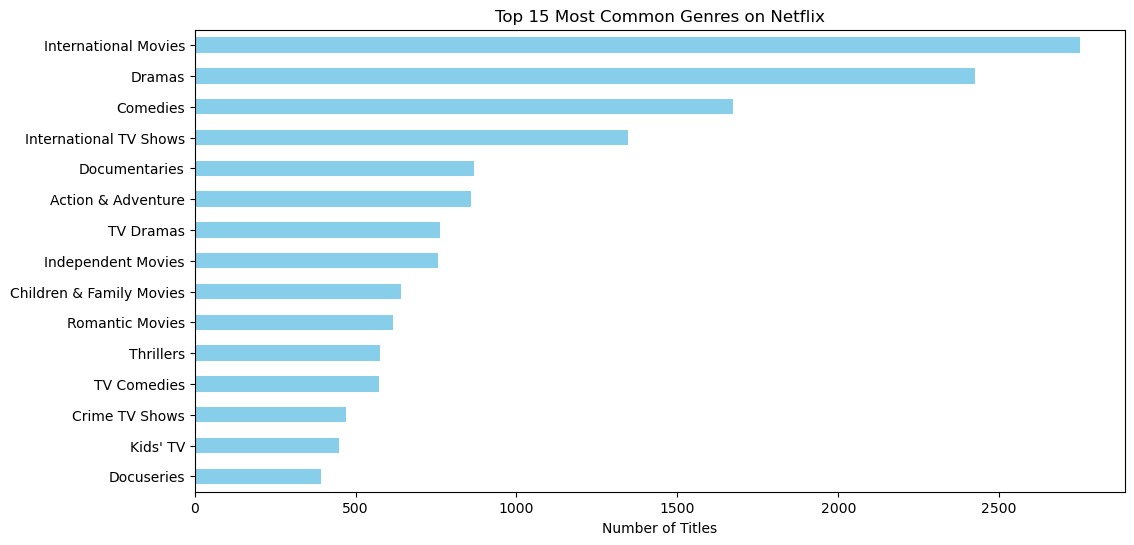

In [6]:
# Count most frequent genres
from collections import Counter

all_genres = ','.join(df['listed_in']).split(',')
genre_count = pd.Series(Counter([g.strip() for g in all_genres])).sort_values(ascending=False)

# Plot top genres
plt.figure(figsize=(12, 6))
genre_count[:15].plot(kind='barh', color='skyblue')
plt.xlabel("Number of Titles")
plt.title("Top 15 Most Common Genres on Netflix")
plt.gca().invert_yaxis()
plt.show()


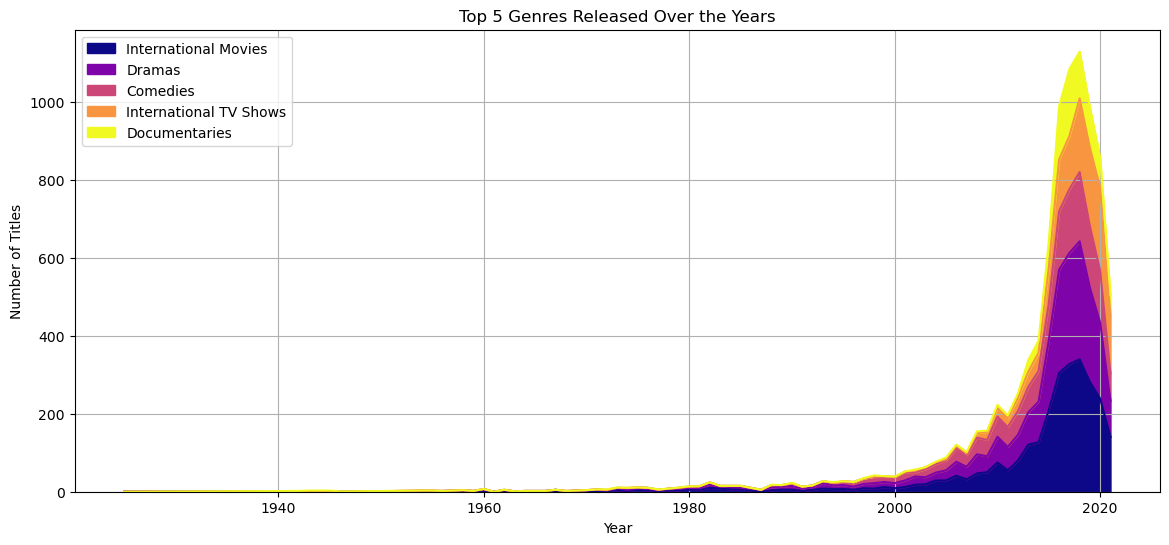

In [40]:
# Create genre-year matrix
from collections import defaultdict

genre_year = defaultdict(lambda: defaultdict(int))
for _, row in df.iterrows():
    year = row['release_year']
    genres = row['listed_in'].split(',')
    for genre in genres:
        genre_year[genre.strip()][year] += 1

genre_df = pd.DataFrame(genre_year).fillna(0).astype(int).sort_index()

# Plot stacked area for top 5 genres
top_genres = genre_df.sum().sort_values(ascending=False).head(5).index
genre_df[top_genres].plot.area(figsize=(14, 6), colormap='plasma')
plt.title("Top 5 Genres Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


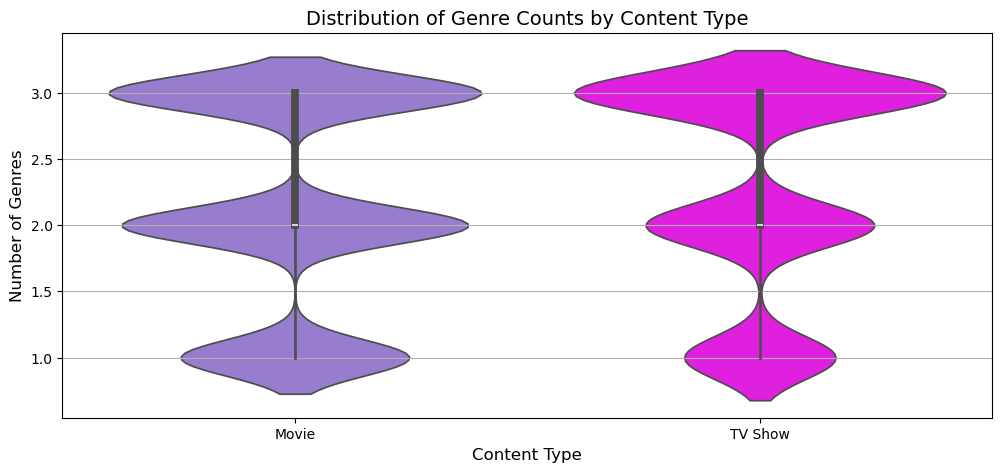

In [41]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='type', y='genre_count', data=df, palette={'Movie': 'mediumpurple', 'TV Show': 'magenta'}, hue='type', legend=False)
plt.title("Distribution of Genre Counts by Content Type", fontsize=14)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Number of Genres", fontsize=12)
plt.grid(True, axis='y')
plt.show()


## **📺 Content Type Distribution**
Explore the number of Movies vs TV Shows.

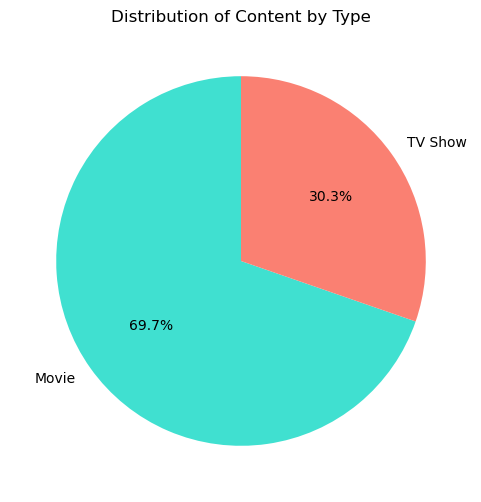

In [15]:
# Pie chart of content types
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['turquoise','salmon'], startangle=90)
plt.title('Distribution of Content by Type')
plt.ylabel('')
plt.show()


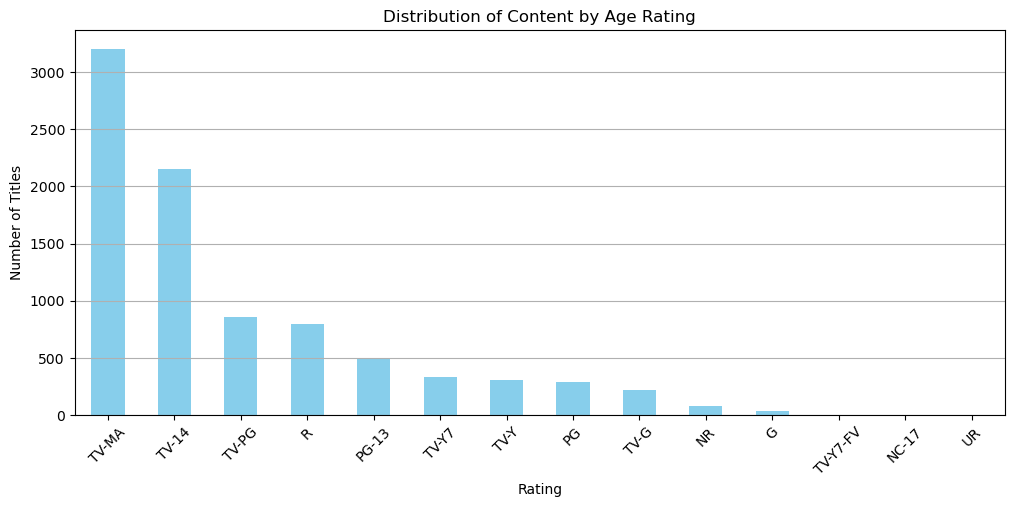

In [7]:
plt.figure(figsize=(12, 5))
df['rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Content by Age Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

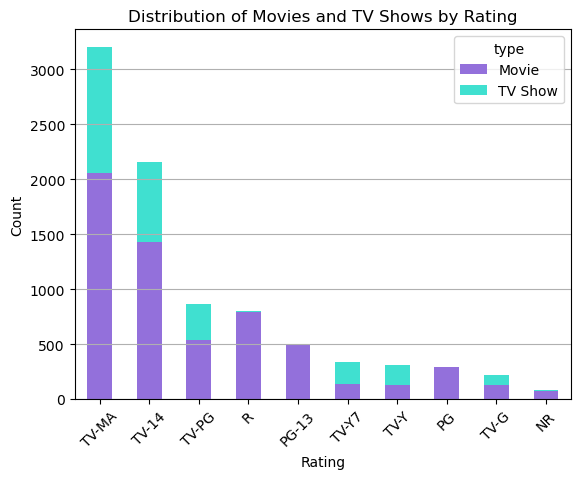

In [32]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['rating'], df['type']).loc[
    df['rating'].value_counts().head(10).index
].plot(kind='bar', stacked=True, color=['mediumpurple', 'turquoise'])
plt.title("Distribution of Movies and TV Shows by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## **🌍 Top Producing Countries**
Visualizing countries contributing most to Netflix content.

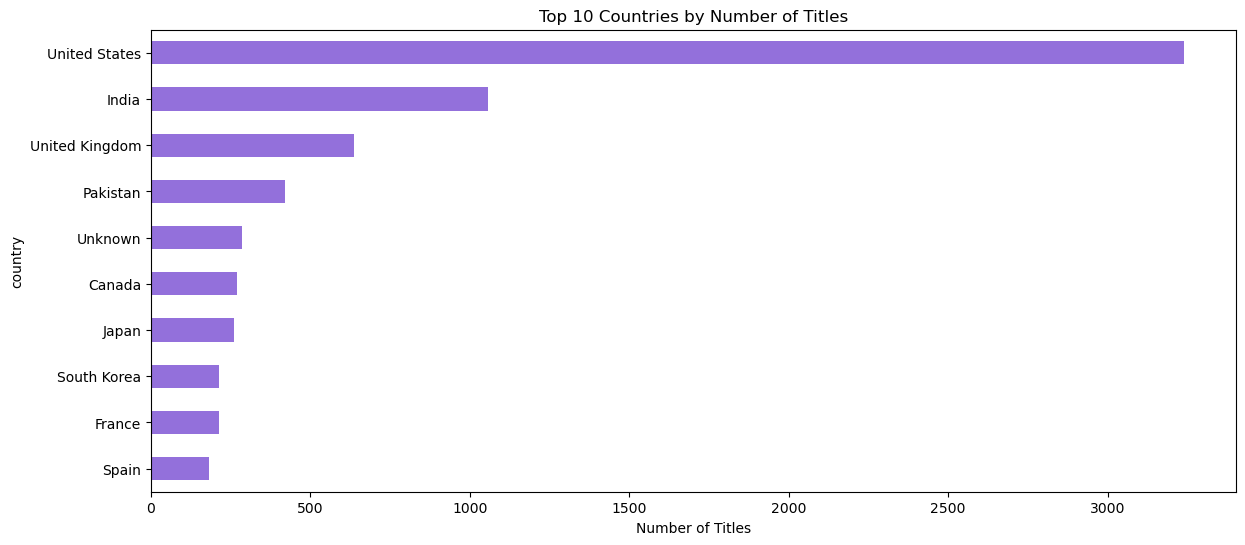

In [8]:
plt.figure(figsize=(14, 6))
df['country'].value_counts().head(10).plot(kind='barh', color='mediumpurple')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


## **⏱️ Movie Duration Distribution**
Visualizing how long Netflix movies usually are.

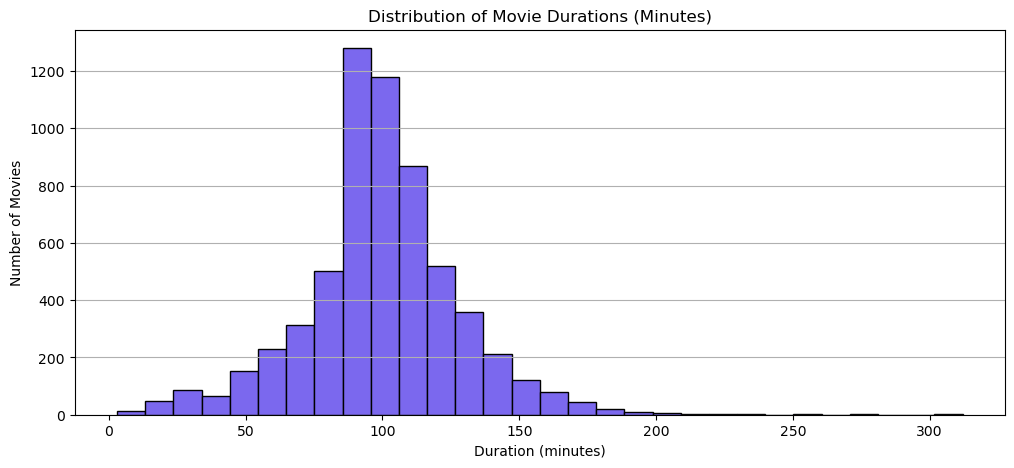

In [33]:
plt.figure(figsize=(12, 5))
df[df['type'] == 'Movie']['duration_int'].dropna().plot(kind='hist', bins=30, color='mediumslateblue', edgecolor='black')
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(axis='y')
plt.show()


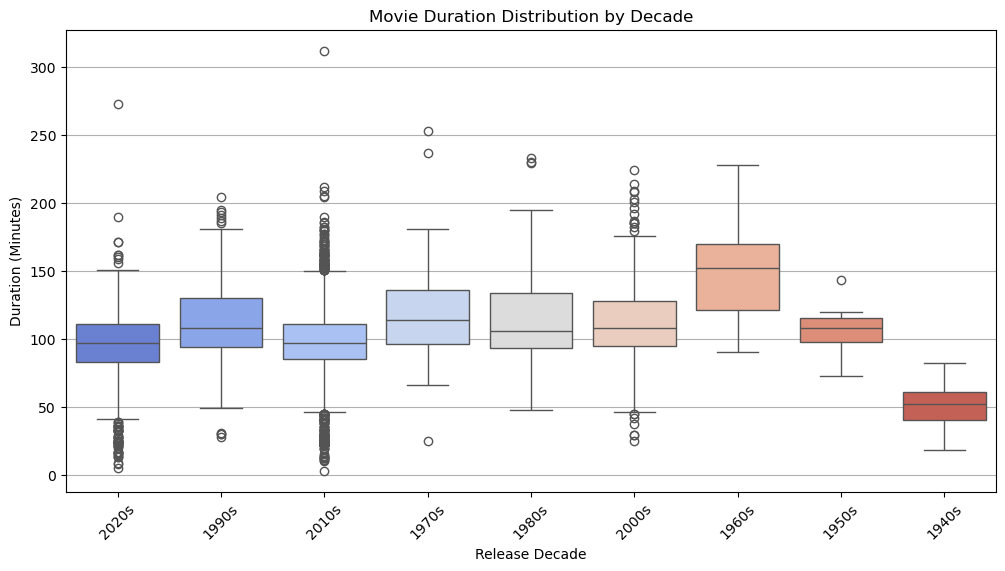

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[df['type'] == 'Movie'],
    x='decade',
    y='duration_int',
    hue='decade',             
    palette='coolwarm',
    legend=False             
)
plt.title("Movie Duration Distribution by Decade")
plt.xlabel("Release Decade")
plt.ylabel("Duration (Minutes)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## **📈 Content Added Over Years**
Check how Netflix content has increased over time.

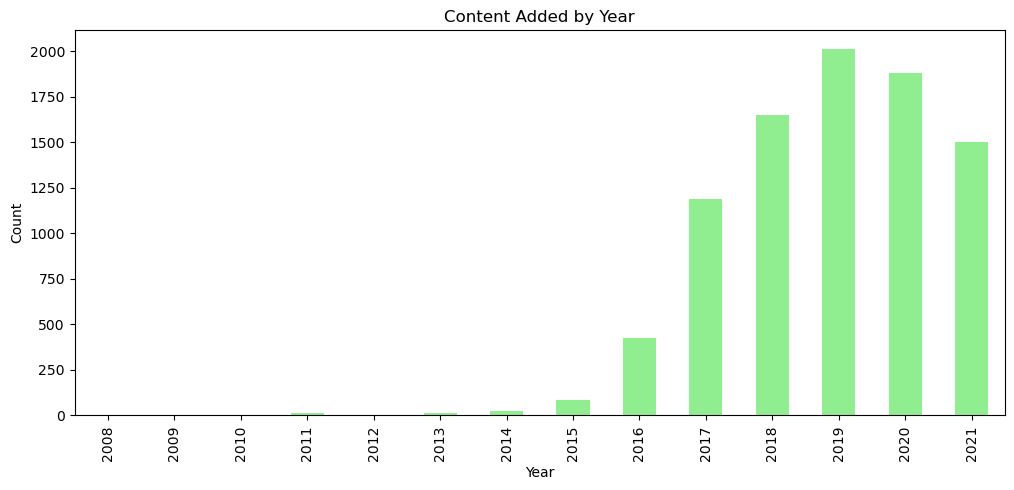

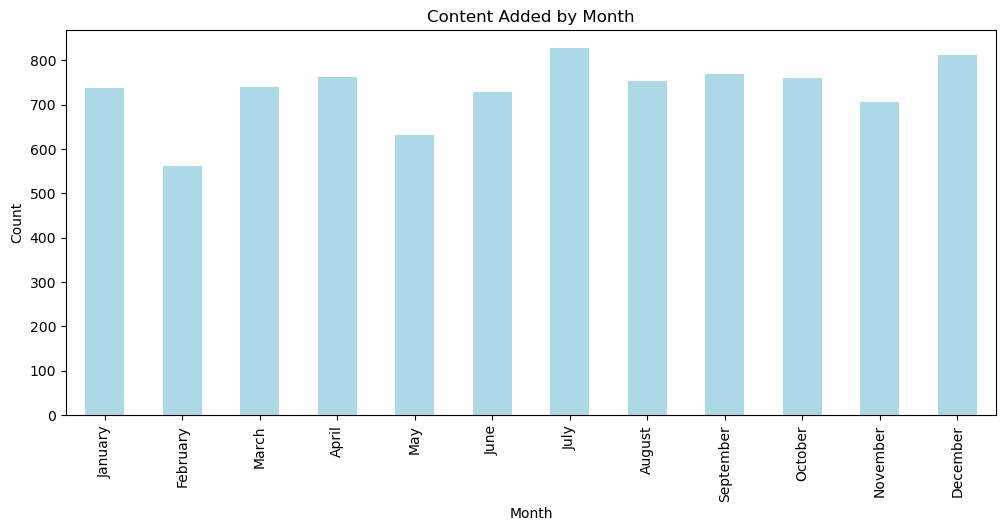

In [22]:
# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Plot by year
plt.figure(figsize=(12, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Content Added by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Plot by month
plt.figure(figsize=(12, 5))
df['month_added'].value_counts().loc[
    ['January','February','March','April','May','June','July','August','September','October','November','December']
].plot(kind='bar', color='lightblue')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


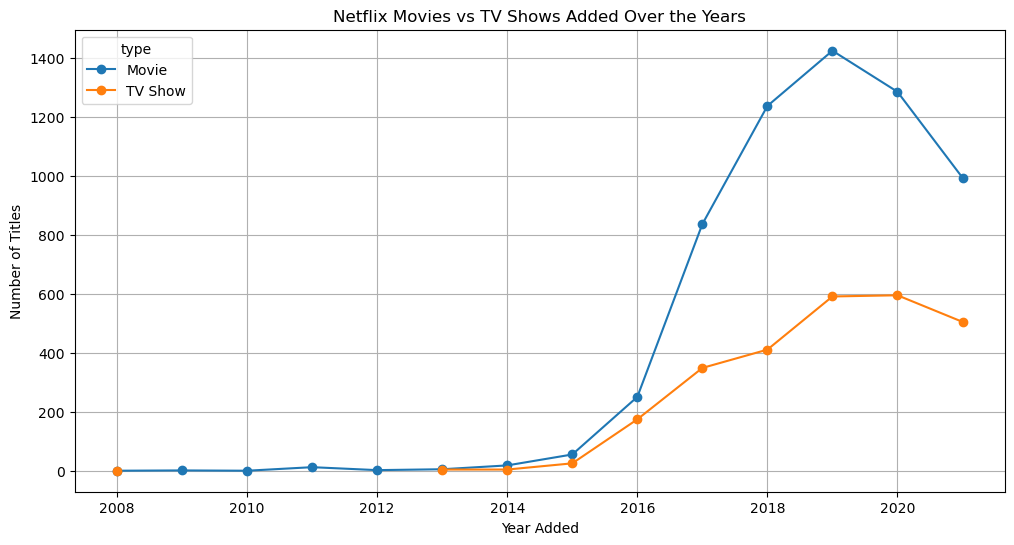

In [11]:
content_trend = df.groupby(['year_added', 'type']).size().unstack()

content_trend.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Netflix Movies vs TV Shows Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


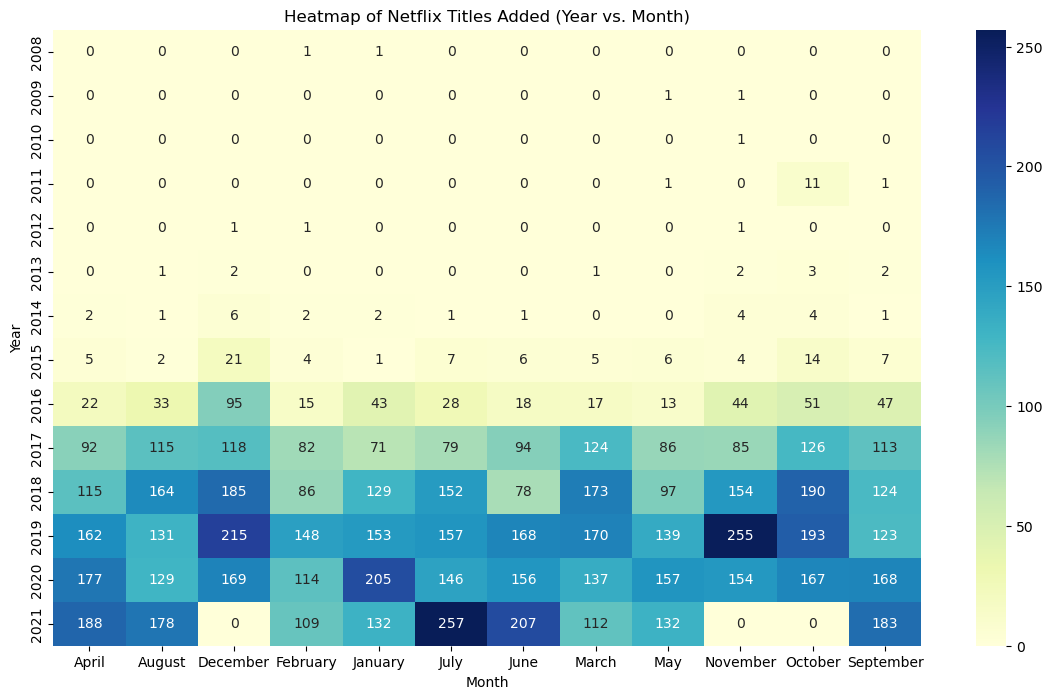

In [10]:
heatmap_data = df.pivot_table(index=df['date_added'].dt.year,
                               columns=df['date_added'].dt.month_name(),
                               values='show_id',
                               aggfunc='count').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Netflix Titles Added (Year vs. Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [49]:
# Helper function to get top 5 directors by genre keyword
def top_directors_by_genre(genre_keyword):
    filtered = df[df['listed_in'].str.contains(genre_keyword, case=False)]
    return filtered[filtered['director'] != 'Unknown']['director'].value_counts().head(5)

# Top directors by genre
genres = ['Action', 'Adventure', 'Comedy', 'Romantic']

for genre in genres:
    print(f"\nTop 5 Directors in {genre}:")
    print(top_directors_by_genre(genre))



Top 5 Directors in Action:
director
Don Michael Paul     9
S.S. Rajamouli       7
Toshiya Shinohara    7
Hidenori Inoue       7
Thierry Donard       5
Name: count, dtype: int64

Top 5 Directors in Adventure:
director
Don Michael Paul     9
S.S. Rajamouli       7
Toshiya Shinohara    7
Hidenori Inoue       7
Thierry Donard       5
Name: count, dtype: int64

Top 5 Directors in Comedy:
director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 13
Jay Chapman               12
Lance Bangs                8
Name: count, dtype: int64

Top 5 Directors in Romantic:
director
Cathy Garcia-Molina    8
Justin G. Dyck         6
Mae Czarina Cruz       4
Roger Kumble           4
Hakan Algül            4
Name: count, dtype: int64


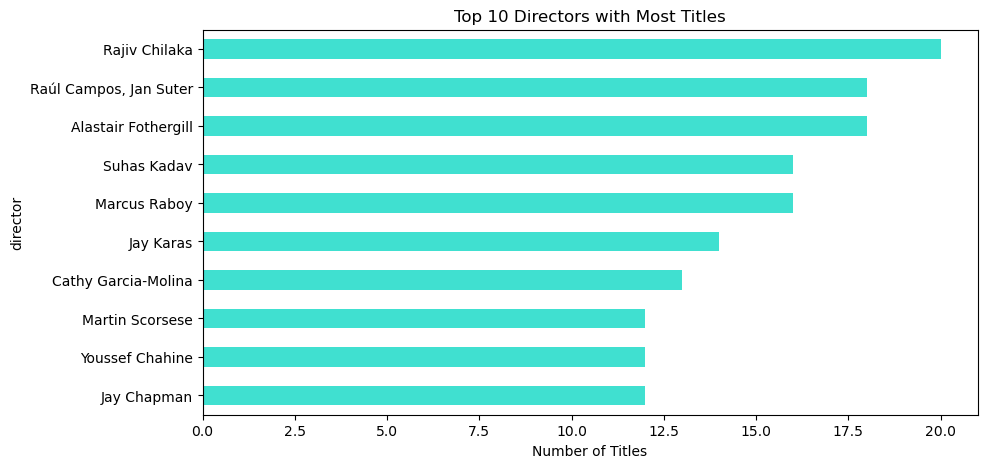

In [51]:
# Exclude unknown directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_directors.plot(kind='barh', color='turquoise')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


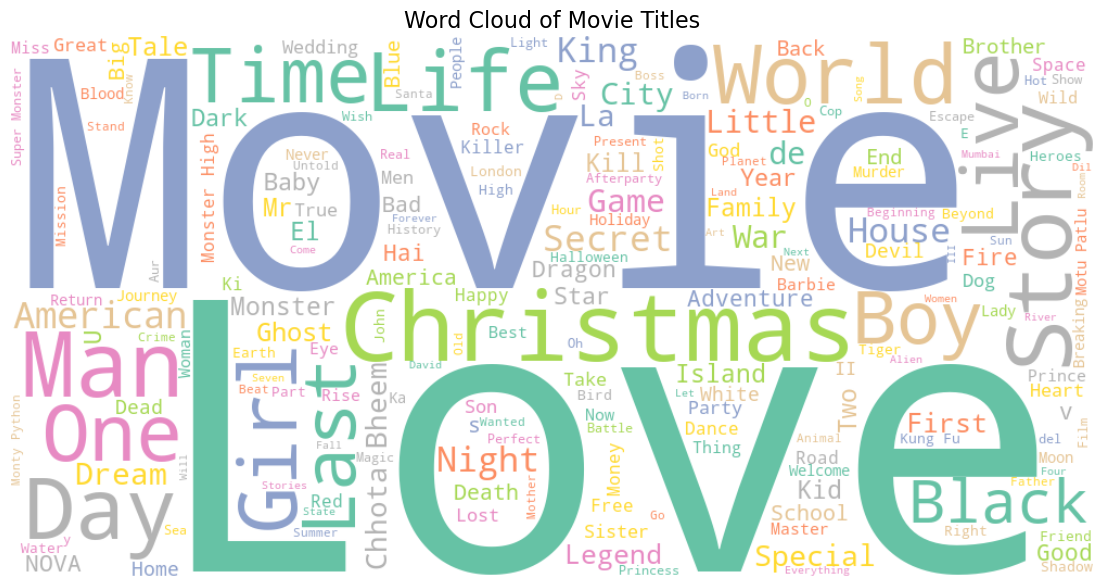

In [48]:
# Filter for movies and join all titles
movie_titles = ' '.join(df[df['type'] == 'Movie']['title'])

# Generate Word Cloud
plt.figure(figsize=(14, 8))
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Set2').generate(movie_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles', fontsize=16)
plt.show()
